[*********************100%%**********************]  1 of 1 completed


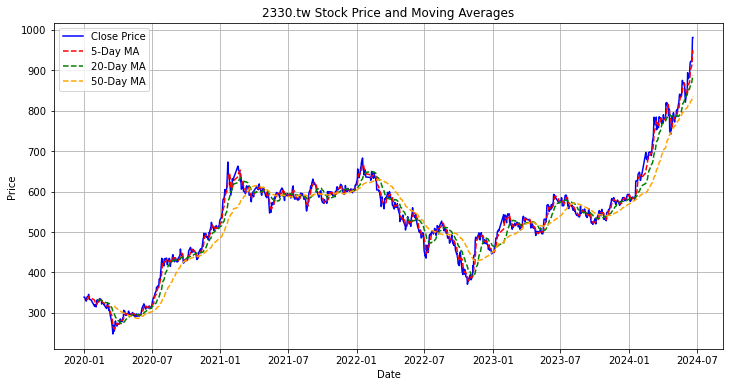

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 從Yahoo Finance獲取股票數據
ticker = '2330.tw'
data = yf.download(ticker, start='2020-01-01', end='2024-07-01')

# 計算均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# 繪製均線圖
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA5'], label='5-Day MA', color='red', linestyle='--')
plt.plot(data['MA20'], label='20-Day MA', color='green', linestyle='--')
plt.plot(data['MA50'], label='50-Day MA', color='orange', linestyle='--')

# 添加圖表標題和軸標籤
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


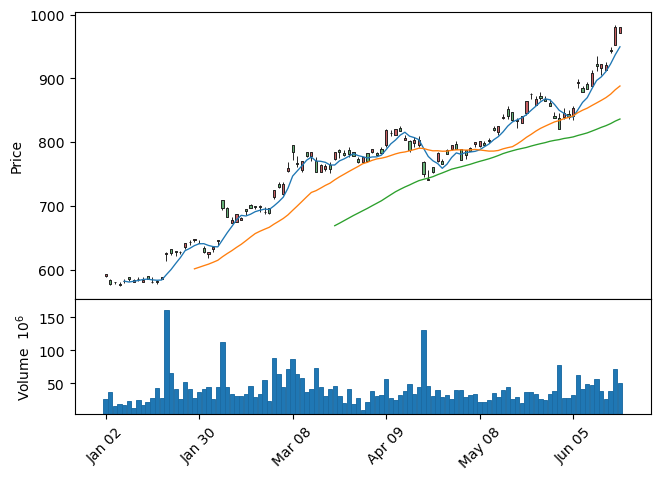

In [13]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

# 從Yahoo Finance獲取股票數據
ticker = '2330.tw'
data = yf.download(ticker, start='2024-01-01', end='2024-07-01')

# 計算均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# 選擇需要繪製的列
data_plot = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20', 'MA50']]

# 繪製K線圖和均線
mc = mpf.make_marketcolors(up='r',down='g')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(data_plot, type='candle', mav=(5, 20, 50), volume=True, show_nontrading=False, style=s)


[*********************100%%**********************]  1 of 1 completed


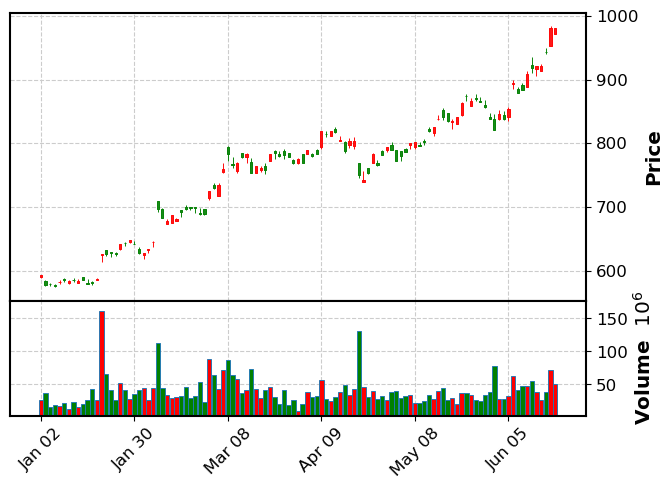

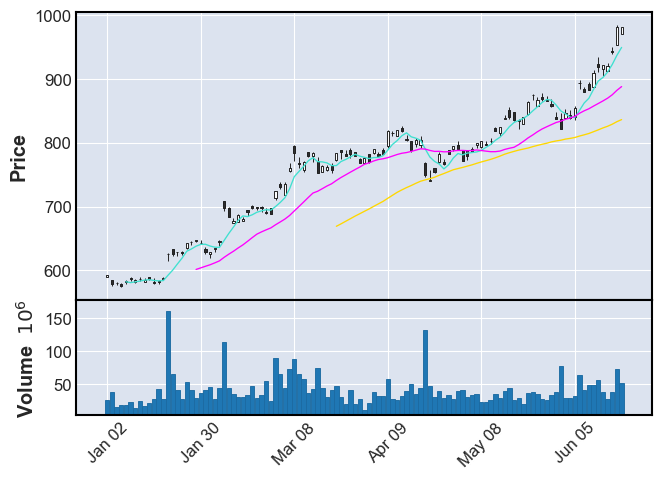

In [11]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import seaborn as sns

sns.set_theme()

# 從Yahoo Finance獲取股票數據
ticker = '2330.tw'
data = yf.download(ticker, start='2024-01-01', end='2024-07-01')

# 計算均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# 定義自定義顏色樣式
custom_style = mpf.make_mpf_style(
    base_mpf_style='classic', 
    marketcolors=mpf.make_marketcolors(
        up='red',      # 上漲K線的顏色
        down='green',  # 下跌K線的顏色
        edge='inherit', 
        wick='inherit', 
        volume='inherit'
    )
)

# 選擇需要繪製的列
data_plot = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20', 'MA50']]

# 繪製K線圖和均線，應用自定義顏色樣式
mpf.plot(
    data_plot, 
    type='candle', 
#     mav=(5, 20, 50), 
    volume=True, 
    show_nontrading=False,
    style=custom_style
)

mpf.plot(data_plot, type='candle', mav=(5, 20, 50), volume=True, show_nontrading=False)



[*********************100%%**********************]  1 of 1 completed


/Users/lzrong/anaconda3/envs/hahow_fin/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


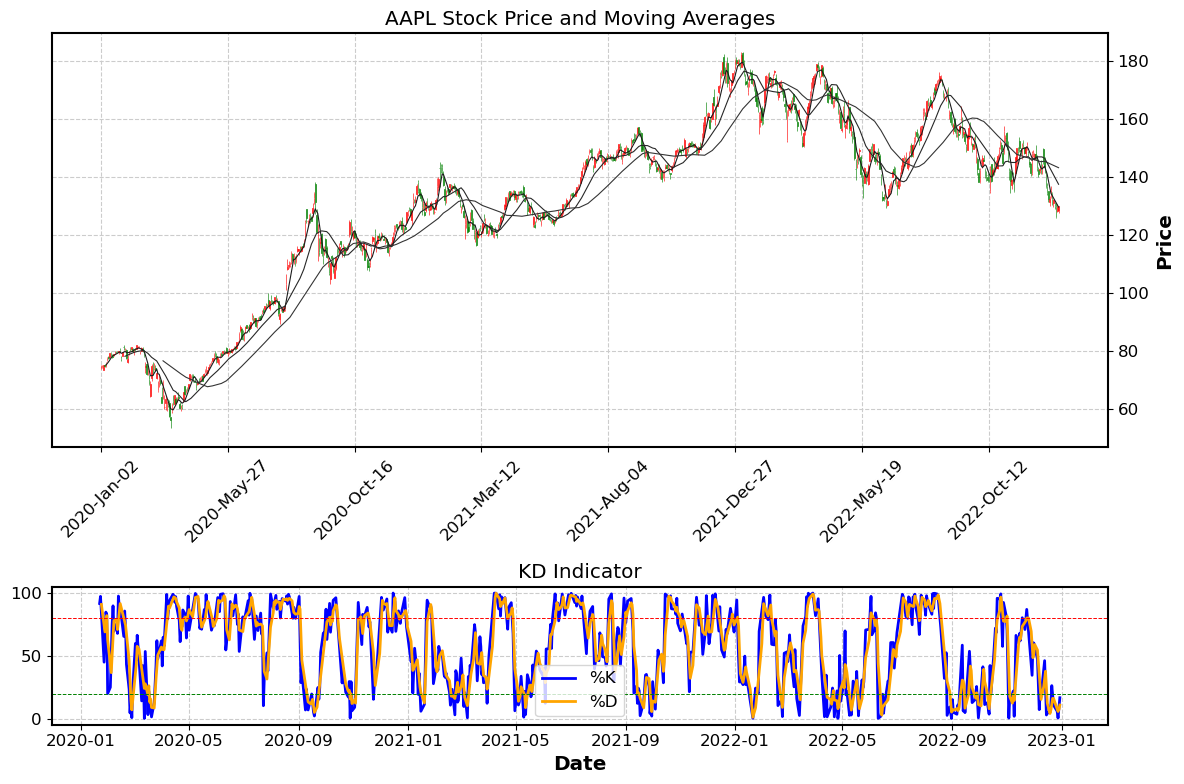

In [35]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# 從Yahoo Finance獲取股票數據
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# 計算均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# 計算KD指標
n = 14  # KD指標的計算週期
data['Low_Min'] = data['Low'].rolling(window=n).min()
data['High_Max'] = data['High'].rolling(window=n).max()
data['%K'] = 100 * (data['Close'] - data['Low_Min']) / (data['High_Max'] - data['Low_Min'])
data['%D'] = data['%K'].rolling(window=3).mean()

# 定義自定義顏色樣式
custom_style = mpf.make_mpf_style(
    base_mpf_style='classic', 
    marketcolors=mpf.make_marketcolors(
        up='red',      # 上漲K線的顏色
        down='green',  # 下跌K線的顏色
        edge='inherit', 
        wick='inherit', 
        volume='inherit'
    )
)

# 選擇需要繪製的列
data_plot = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20', 'MA50']]

# 繪製K線圖和均線，應用自定義顏色樣式
fig, ax = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

mpf.plot(
    data_plot, 
    type='candle', 
    mav=(5, 20, 50), 
    volume=False, 
    show_nontrading=False,
    style=custom_style,
    ax=ax[0]
)

# # 繪製KD指標
ax[1].plot(data.index, data['%K'], label='%K', color='blue')
ax[1].plot(data.index, data['%D'], label='%D', color='orange')
ax[1].axhline(80, color='red', linestyle='--', linewidth=0.7)  # 超買線
ax[1].axhline(20, color='green', linestyle='--', linewidth=0.7)  # 超賣線
ax[1].legend()

# 設置標題和軸標籤
ax[0].set_title(f'{ticker} Stock Price and Moving Averages')
ax[1].set_title('KD Indicator')
ax[1].set_xlabel('Date')

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/Users/lzrong/anaconda3/envs/hahow_fin/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


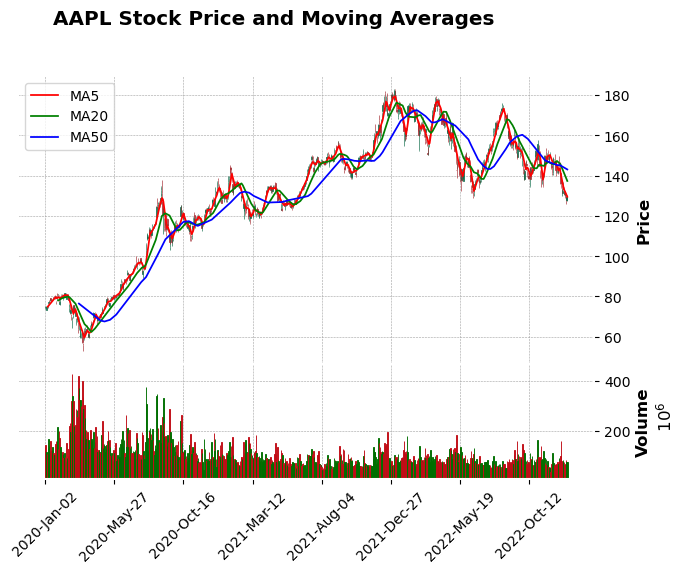

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


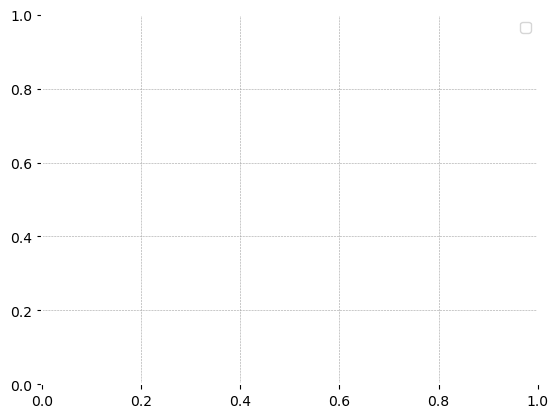

In [46]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

# 從Yahoo Finance獲取股票數據
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# 計算均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# 準備添加均線的圖例
apds = [mpf.make_addplot(data['MA5'], color='red', label='MA5'),
        mpf.make_addplot(data['MA20'], color='green', label='MA20'),
        mpf.make_addplot(data['MA50'], color='blue', label='MA50')]

# 繪圖並添加圖例
mpf.plot(data, type='candle', style='charles', addplot=apds,
         title=f'{ticker} Stock Price and Moving Averages',
         ylabel='Price',
         ylabel_lower='Volume',
         volume=True)

# 顯示圖例
import matplotlib.pyplot as plt
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


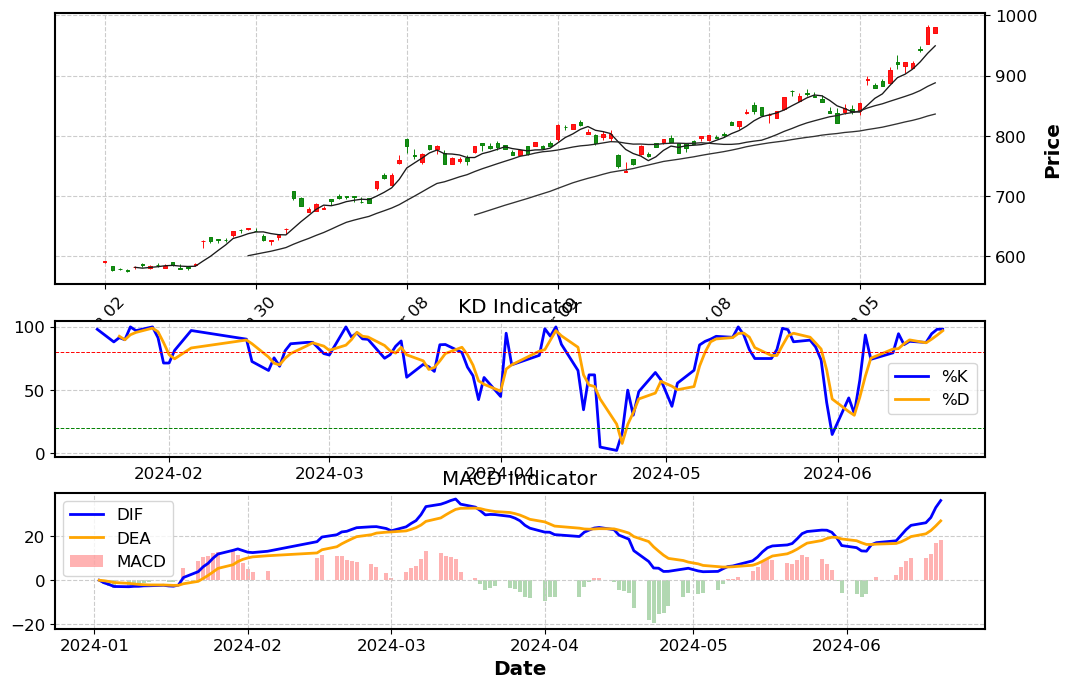

In [45]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# 從Yahoo Finance獲取股票數據
ticker = '2330.tw'
data = yf.download(ticker, start='2024-01-01', end='2024-07-01')

# 計算均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# 計算KD指標
n = 14  # KD指標的計算週期
data['Low_Min'] = data['Low'].rolling(window=n).min()
data['High_Max'] = data['High'].rolling(window=n).max()
data['%K'] = 100 * (data['Close'] - data['Low_Min']) / (data['High_Max'] - data['Low_Min'])
data['%D'] = data['%K'].rolling(window=3).mean()

# 計算MACD指標
ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
data['DIF'] = ema_12 - ema_26
data['DEA'] = data['DIF'].ewm(span=9, adjust=False).mean()
data['MACD'] = (data['DIF'] - data['DEA']) * 2  # 通常乘以2

# 定義自定義顏色樣式
custom_style = mpf.make_mpf_style(
    base_mpf_style='classic', 
    marketcolors=mpf.make_marketcolors(
        up='red',      # 上漲K線的顏色
        down='green',  # 下跌K線的顏色
        edge='inherit', 
        wick='inherit', 
        volume='inherit'
    )
)

# 選擇需要繪製的列
data_plot = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20', 'MA50']]

fig, ax = plt.subplots(3, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1, 1]})


# 繪製K線圖和均線，應用自定義顏色樣式
mpf.plot(
    data_plot, 
    type='candle', 
    mav=(5, 20, 50), 
    volume=False, 
    show_nontrading=False,
    style=custom_style,
    returnfig=True,
    ax=ax[0],
)
# # 繪製KD指標
ax[1].plot(data.index, data['%K'], label='%K', color='blue')
ax[1].plot(data.index, data['%D'], label='%D', color='orange')
ax[1].axhline(80, color='red', linestyle='--', linewidth=0.7)  # 超買線
ax[1].axhline(20, color='green', linestyle='--', linewidth=0.7)  # 超賣線
ax[1].legend()
ax[1].set_title('KD Indicator')

# # # 繪製MACD指標
bar_colors = ['red' if val >= 0 else 'green' for val in data['MACD']]

ax[2].plot(data.index, data['DIF'], label='DIF', color='blue')
ax[2].plot(data.index, data['DEA'], label='DEA', color='orange')
ax[2].bar(data.index, data['MACD'], label='MACD', color=bar_colors, alpha=0.3)
ax[2].legend()
ax[2].set_title('MACD Indicator')

# # # 設置軸標籤
ax[2].set_xlabel('Date')

plt.show()



In [21]:
import pandas as pd

# 創建一個示例數據集
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 計算使用調整加權因子的EWMA
ewm_adjust_true = data.ewm(span=3, adjust=True).mean()

# 計算不使用調整加權因子的EWMA
ewm_adjust_false = data.ewm(span=3, adjust=False).mean()

print("Adjust=True:\n", ewm_adjust_true)
print("\nAdjust=False:\n", ewm_adjust_false)


Adjust=True:
 0    1.000000
1    1.666667
2    2.428571
3    3.266667
4    4.161290
5    5.095238
6    6.055118
7    7.031373
8    8.017613
9    9.009775
dtype: float64

Adjust=False:
 0    1.000000
1    1.500000
2    2.250000
3    3.125000
4    4.062500
5    5.031250
6    6.015625
7    7.007812
8    8.003906
9    9.001953
dtype: float64


[*********************100%%**********************]  1 of 1 completed


/Users/lzrong/anaconda3/envs/hahow_fin/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/var/folders/wz/nykyh5gs2ydchhm_zdd_mkth0000gn/T/ipykernel_65866/2647869084.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


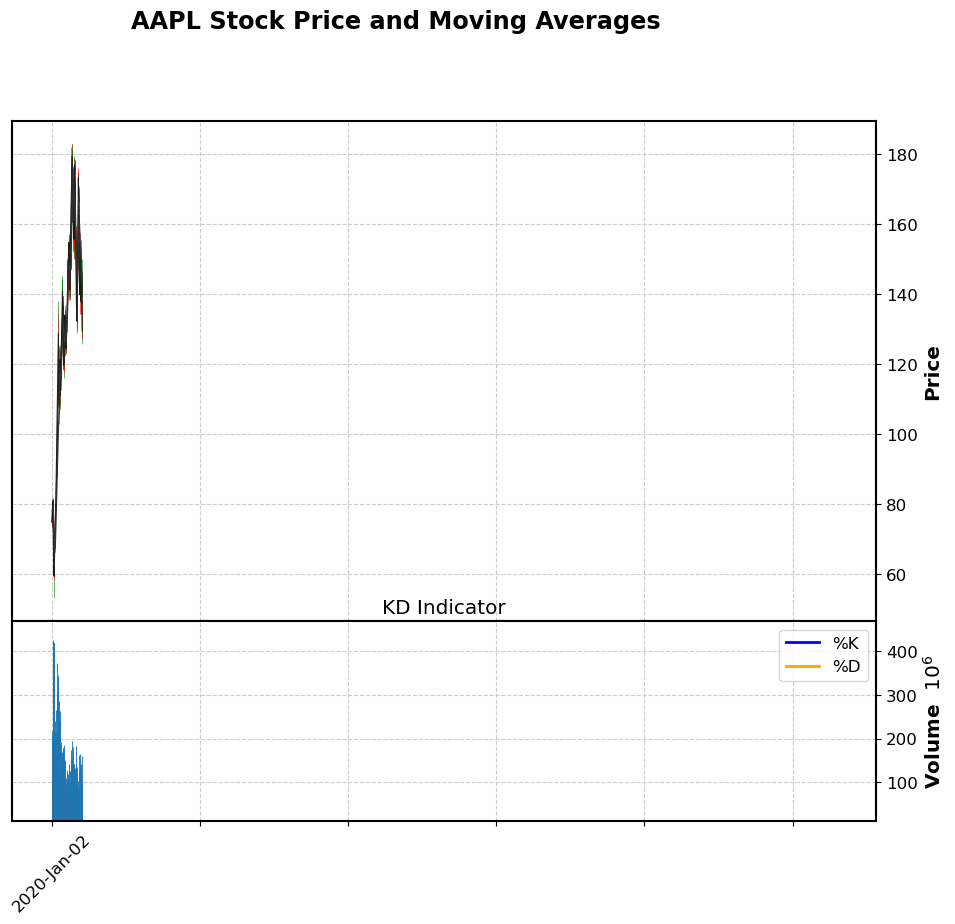

In [30]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# 從Yahoo Finance獲取股票數據
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# 計算均線
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# 計算KD指標
n = 14  # KD指標的計算週期
data['Low_Min'] = data['Low'].rolling(window=n).min()
data['High_Max'] = data['High'].rolling(window=n).max()
data['%K'] = 100 * (data['Close'] - data['Low_Min']) / (data['High_Max'] - data['Low_Min'])
data['%D'] = data['%K'].rolling(window=3).mean()

# 計算MACD指標
ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
data['DIF'] = ema_12 - ema_26
data['DEA'] = data['DIF'].ewm(span=9, adjust=False).mean()
data['MACD'] = (data['DIF'] - data['DEA']) * 2  # 通常乘以2

# 定義自定義顏色樣式
custom_style = mpf.make_mpf_style(
    base_mpf_style='classic', 
    marketcolors=mpf.make_marketcolors(
        up='red',      # 上漲K線的顏色
        down='green',  # 下跌K線的顏色
        edge='inherit', 
        wick='inherit', 
        volume='inherit'
    )
)

# 選擇需要繪製的列
data_plot = data[['Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20', 'MA50']]

# 繪製K線圖和均線，應用自定義顏色樣式
fig, axes = mpf.plot(
    data_plot, 
    type='candle', 
    mav=(5, 20, 50), 
    volume=True, 
    show_nontrading=False,
    style=custom_style,
    returnfig=True,
    figsize=(12, 10),
    title=f'{ticker} Stock Price and Moving Averages'
)

# 繪製KD指標
axes[2].plot(data.index, data['%K'], label='%K', color='blue')
axes[2].plot(data.index, data['%D'], label='%D', color='orange')
axes[2].axhline(80, color='red', linestyle='--', linewidth=0.7)  # 超買線
axes[2].axhline(20, color='green', linestyle='--', linewidth=0.7)  # 超賣線
axes[2].legend()
axes[2].set_title('KD Indicator')

# 繪製MACD指標
axes[3].plot(data.index, data['DIF'], label='DIF', color='blue')
axes[3].plot(data.index, data['DEA'], label='DEA', color='orange')
axes[3].bar(data.index, data['MACD'], label='MACD', color='grey', alpha=0.3)
axes[3].legend()
axes[3].set_title('MACD Indicator')

# 設置軸標籤
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()


In [31]:
data

,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA50,Low_Min,High_Max,%K,%D,DIF,DEA,MACD
Date,,,,,,,,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059425,135480400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349121,146322800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.058234,-0.011647,-0.093174
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.055930,-0.020503,-0.070854
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582657,108872000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.081607,-0.032724,-0.097766
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750252,132079200,74.958000,NaN,NaN,NaN,NaN,NaN,NaN,-0.005068,-0.027193,0.044250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.959961,63814900,132.841998,140.6610,144.131800,129.639999,149.970001,10.919828,16.161728,-3.670694,-2.570162,-2.201064
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.142426,69007800,132.373999,139.9515,143.964799,128.720001,149.970001,6.164694,9.403822,-3.936230,-2.843375,-2.185710
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.179672,85438400,131.121999,139.1950,143.637399,125.870003,149.970001,0.705387,5.929970,-4.417705,-3.158241,-2.518927


[*********************100%%**********************]  1 of 1 completed


/Users/lzrong/anaconda3/envs/hahow_fin/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


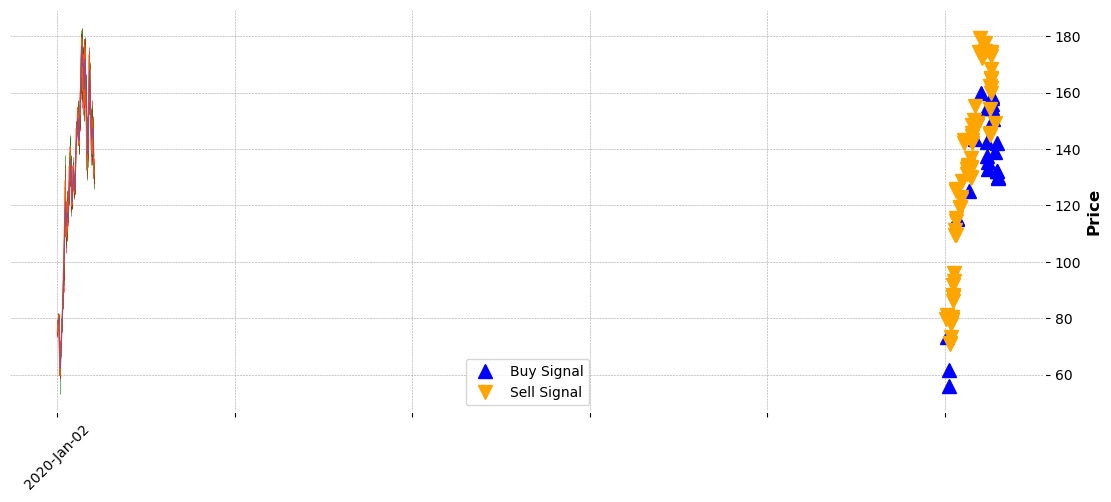

In [48]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

# 從 Yahoo Finance 獲取股票數據
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# 計算 KD 指標
n = 14  # KD 指標的計算週期
data['Low_Min'] = data['Low'].rolling(window=n).min()
data['High_Max'] = data['High'].rolling(window=n).max()
data['%K'] = 100 * (data['Close'] - data['Low_Min']) / (data['High_Max'] - data['Low_Min'])
data['%D'] = data['%K'].rolling(window=3).mean()

# 計算買入和賣出訊號
data['Buy_Signal'] = ((data['%K'] < 20) & (data['%K'] > data['%D']))
data['Sell_Signal'] = ((data['%K'] > 80) & (data['%K'] < data['%D']))

# 準備標記買入和賣出訊號的點
buy_signals = data.loc[data['Buy_Signal'], ['Close']]
sell_signals = data.loc[data['Sell_Signal'], ['Close']]

# 定義自定義市場顏色
mc = mpf.make_marketcolors(
    up='red',      # 上漲K線顏色
    down='green',  # 下跌K線顏色
    edge={'up': 'red', 'down': 'green'},  # K線邊緣顏色
    wick={'up': 'red', 'down': 'green'},  # K線影線顏色
    volume={'up': 'blue', 'down': 'orange'}  # 成交量顏色
)

# 創建自定義樣式
custom_style = mpf.make_mpf_style(
    base_mpf_style='charles', 
    marketcolors=mc
)

# 繪製 K 線圖並應用自定義樣式
fig, axlist = mpf.plot(data, type='candle', mav=(5, 10, 20), figratio=(25, 10),
                       style=custom_style, returnfig=True)

# 繪製買入和賣出訊號
ax = axlist[0]  # 獲取主圖的軸對象
ax.plot(buy_signals.index, buy_signals['Close'], '^', markersize=10, color='blue', label='Buy Signal')
ax.plot(sell_signals.index, sell_signals['Close'], 'v', markersize=10, color='orange', label='Sell Signal')

# 添加圖例
ax.legend()

# 顯示圖表
plt.show()


/Users/lzrong/anaconda3/envs/hahow_fin/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


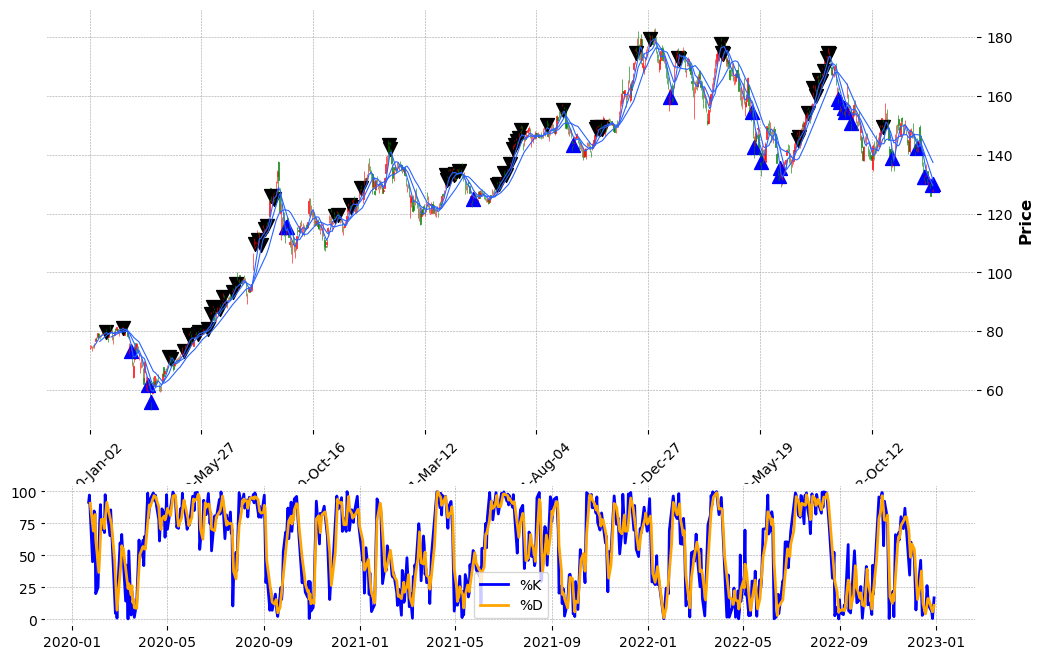

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={"height_ratios": [3, 1]})

custom_style = mpf.make_mpf_style(
    base_mpf_style="tradingview",
    marketcolors=mpf.make_marketcolors(
        up="red",
        down="green",
        edge={'up': 'red', 'down': 'green'},  # K線邊緣顏色
        wick={'up': 'red', 'down': 'green'},  # K線影線顏色
        volume={'up': 'red', 'down': 'green'}
        
    )
)

# 計算買入和賣出訊號
data['Buy_Signal'] = data["Close"].where((data['%K'] < 20) & (data['%K'] > data['%D']), pd.NA)
data['Sell_Signal'] = data["Close"].where((data['%K'] > 80) & (data['%K'] < data['%D']), pd.NA)


apds = [mpf.make_addplot(data['Buy_Signal']  ,type='scatter' ,
                         markersize=100,marker='^', 
                         color="blue", ax=ax[0]),
        mpf.make_addplot(data['Sell_Signal']  ,type='scatter' ,
                         markersize=100,marker='v', 
                         color="black", ax=ax[0])
       ]

mpf.plot(data=data, type='candle', mav=(5, 10, 20),
         style=custom_style, addplot=apds, ax=ax[0])

ax[1].plot(data.index, data["%K"], color="blue", label="%K")
ax[1].plot(data.index, data["%D"], color="orange", label="%D")
plt.legend()
plt.show()